<a href="https://colab.research.google.com/github/swapnilbetkar/python/blob/Dev_Self/VehicleCollision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [25]:
#import dataset
dataset = pd.read_csv("/content/drive/MyDrive/Datasets/VehicleCollisions.csv")
pd.set_option('display.max_columns',None)
dataset.head()
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37869 entries, 0 to 37868
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Number_of_Vehicles       37869 non-null  int64 
 1   Road_Type                37869 non-null  object
 2   Speed_limit              37869 non-null  int64 
 3   Light_Conditions         37869 non-null  object
 4   Weather_Conditions       37869 non-null  object
 5   Road_Surface_Conditions  37869 non-null  object
 6   Urban_or_Rural_Area      37869 non-null  object
 7   Vehicle_Manoeuvre        37869 non-null  object
 8   1st_Point_of_Impact      37869 non-null  object
 9   Sex_of_Driver            37869 non-null  object
 10  Age_of_Driver            37869 non-null  int64 
 11  Engine_Capacity_(CC)     37869 non-null  int64 
 12  Damage                   37869 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.8+ MB
None


In [26]:
dataset['Damage'] = dataset['Damage'].map({'Light':1, 'Severe':0})
le = LabelEncoder()
categorical_features = ['Urban_or_Rural_Area','Sex_of_Driver','1st_Point_of_Impact','Road_Type','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Vehicle_Manoeuvre']
dataset[categorical_features] = dataset[categorical_features].apply(le.fit_transform)

final_data = dataset
# dataset.head()
# categorical_feature = ['1st_Point_of_Impact','Road_Type','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Vehicle_Manoeuvre']
# final_data = pd.get_dummies(dataset, columns = categorical_feature)
# final_data.head()

# dataset.head(100)
corrs = dataset.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
figure.show()

# Dividing dataset into label and feature sets
X = final_data.drop(['Damage','Road_Surface_Conditions','Urban_or_Rural_Area'], axis = 1) # Features
Y = final_data['Damage'] # Labels
print(type(X))
print(type(Y))
print(X.shape)
print(Y.shape)

feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

# Tuning the random forest parameter 'n_estimators' and implementing cross-validation using Grid Search
model = Pipeline([
        ('balancing', SMOTE(random_state = 101)),
        ('classification', RandomForestClassifier(criterion='entropy', max_features='auto', random_state=1) )
    ])
grid_param = {'classification__n_estimators': [30,40,50,100,150]}

gd_sr = GridSearchCV(estimator=model, param_grid=grid_param, scoring='precision', cv=5)

gd_sr.fit(X_scaled, Y)

best_parameters = gd_sr.best_params_
print(best_parameters)

best_result = gd_sr.best_score_ # Mean cross-validated score of the best_estimator
print(best_result)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(37869, 10)
(37869,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

{'classification__n_estimators': 30}
0.9356557584102715


Engine_Capacity_(CC)    0.397546
Age_of_Driver           0.302571
Vehicle_Manoeuvre       0.062043
1st_Point_of_Impact     0.053572
Speed_limit             0.044518
Number_of_Vehicles      0.034782
Road_Type               0.034320
Weather_Conditions      0.031302
Sex_of_Driver           0.021253
Light_Conditions        0.018093
dtype: float64


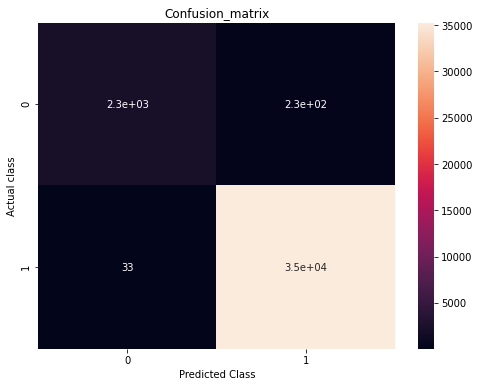

Confusion matrix: 
 [[ 2324   233]
 [   33 35279]]
TP:  35279
TN:  2324
FP:  233
FN:  33


In [27]:
from sklearn import metrics
import seaborn as sns
rfc = RandomForestClassifier(n_estimators=40, criterion='entropy', max_features='auto', random_state=1)
rfc.fit(X_scaled,Y)
featimp = pd.Series(rfc.feature_importances_, index=list(X)).sort_values(ascending=False)
print(featimp)

Y_pred = rfc.predict(X_scaled)

conf_mat = metrics.confusion_matrix(Y, Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat)
print('TP: ', conf_mat[1,1])
print('TN: ', conf_mat[0,0])
print('FP: ', conf_mat[0,1])
print('FN: ', conf_mat[1,0])

In [28]:
X = final_data[['Engine_Capacity_(CC)','Age_of_Driver']]

feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

#Tuning the random forest parameter 'n_estimators' and implementing cross-validation using Grid Search
model = Pipeline([
        ('balancing', SMOTE(random_state = 101)),
        ('classification', RandomForestClassifier(criterion='entropy', max_features='auto', random_state=1) )
    ])
grid_param = {'classification__n_estimators': [30,40,50,100,150]}

gd_sr = GridSearchCV(estimator=model, param_grid=grid_param, scoring='recall', cv=5)

# """
# In the above GridSearchCV(), scoring parameter should be set as follows:
# scoring = 'accuracy' when you want to maximize prediction accuracy
# scoring = 'recall' when you want to minimize false negatives
# scoring = 'precision' when you want to minimize false positives
# scoring = 'f1' when you want to balance false positives and false negatives (place equal emphasis on minimizing both)
# """

gd_sr.fit(X_scaled, Y)

best_parameters = gd_sr.best_params_
print(best_parameters)

best_result = gd_sr.best_score_ # Mean cross-validated score of the best_estimator
print(best_result)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

{'classification__n_estimators': 50}
0.8964088266089878
